# 热力图

**热力图（Heatmap）**是一种通过颜色强度来表示数据的二维图形，它常用于展示数值之间的关系或数据的分布趋势。热力图能够帮助我们快速识别出数据中的模式、趋势和异常。

**适用场景**

- **数据分布展示**：展示二维数据的分布，如人口密度分析、活跃度分析等。
- **相关性分析**：展示变量之间的相关系数矩阵，通过颜色的强度来表示相关性的强弱。
- **地理信息展示**：展示地理位置的数据密度，如人群分布、温度变化等。

## sns.heatmap
- `data`: 数据源，可以是 pandas DataFrame 或类似的数据结构。
- `annot`: 布尔值，控制是否在每个单元格显示数值
- `fmt`: 字符串，指定 annot 参数中数值的格式化字符串
- `cmap`: 字符串或 matplotlib 颜色映射对象，指定热力图的颜色映射方案
- `cbar`: 布尔值，设置是否显示颜色条
- `center`: 设置颜色条的中心值

## 热力图案例

**titanic 数据集**包含了 891 条乘客记录，每条记录描述了乘客的个人信息及其在 Titanic 号上的生存情况
- survived：生存情况（0 = 未生还, 1 = 生还）
- pclass：乘客等级（1 = 一等舱, 2 = 二等舱, 3 = 三等舱）
- age：年龄（float，可能有缺失值）
- sibsp：与乘客同行的兄弟姐妹/配偶数目
- parch：与乘客同行的父母/子女数目
- fare：票价（float）

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

titanic = sns.load_dataset('titanic')   # 加载泰坦尼克数据集
numeric_titanic = titanic.select_dtypes(include=['number'])   #筛选数值型变量
corr = numeric_titanic.corr()   #计算相关性矩阵
corr

,survived,pclass,age,sibsp,parch,fare
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


### 基本热力图

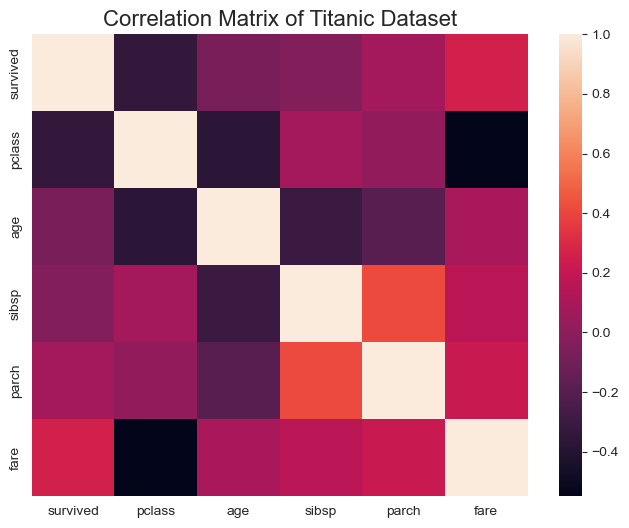

In [2]:
# 设置Seaborn的风格和颜色调色板
sns.set_style("darkgrid")

# 设置图片大小
plt.figure(figsize=(8, 6))  # 设置宽8英寸，高6英寸

# 绘制热力图
sns.heatmap(corr)

# 设置标题
plt.title('Correlation Matrix of Titanic Dataset', fontsize=16)

# 显示图表
plt.show()

### annot控制是否在每个单元格显示数值

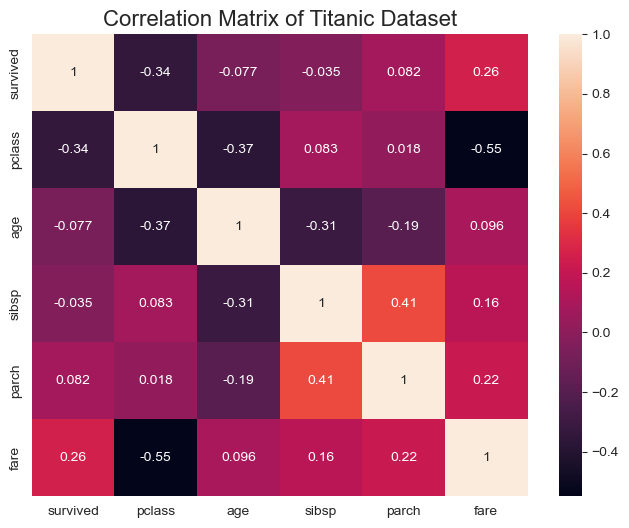

In [3]:
# 设置Seaborn的风格和颜色调色板
sns.set_style("darkgrid")

# 设置图片大小
plt.figure(figsize=(8, 6))  # 设置宽8英寸，高6英寸

# 绘制热力图
sns.heatmap(corr, annot=True)

# 设置标题
plt.title('Correlation Matrix of Titanic Dataset', fontsize=16)

# 显示图表
plt.show()

### fmt设置数值显示格式

- 保留小数位数：
    - '.2f'：保留 2 位小数，f 表示浮动点数。
    - '.3f'：保留 3 位小数。
- 科学计数法：
    - '.1e'：使用科学计数法，保留 1 位有效数字。
    - '.3e'：使用科学计数法，保留 3 位有效数字

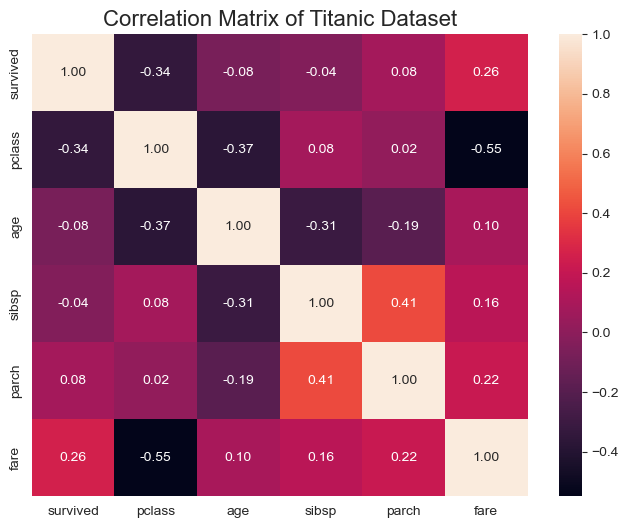

In [4]:
# 设置Seaborn的风格和颜色调色板
sns.set_style("darkgrid")

# 设置图片大小
plt.figure(figsize=(8, 6))  # 设置宽8英寸，高6英寸

# 绘制热力图
sns.heatmap(corr, annot=True, fmt='.2f')

# 设置标题
plt.title('Correlation Matrix of Titanic Dataset', fontsize=16)

# 显示图表
plt.show()

### cmap设置调色板

- 'viridis'：一种深蓝到黄绿色的渐变色。
- 'plasma'：从深紫色到黄色的渐变色。
- 'inferno'：从黑色到亮黄色的渐变色。
- 'YlGnBu'：从黄色到蓝绿色的渐变色。
- 'coolwarm'：蓝色到红色的渐变色，适合表现正负相关。
- 'RdBu_r'：红色和蓝色的调色板，通常用于显示正负值。

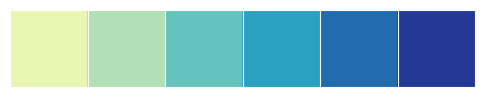

In [5]:
# 查看调色板的实际效果
sns.palplot(sns.color_palette("YlGnBu"))

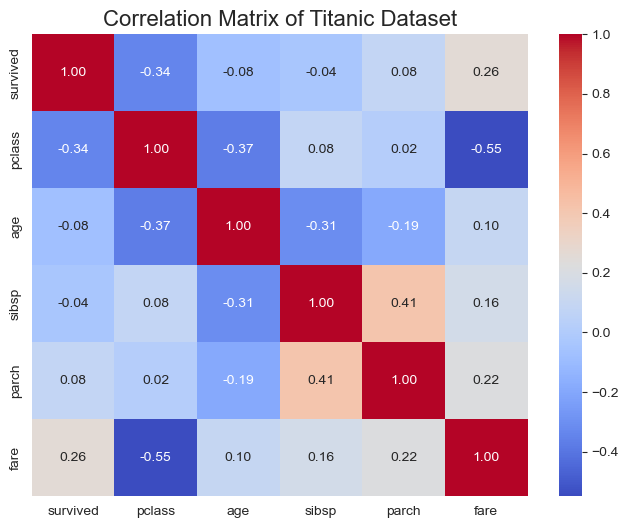

In [6]:
# 设置Seaborn的风格和颜色调色板
sns.set_style("darkgrid")

# 设置图片大小
plt.figure(figsize=(8, 6))  # 设置宽8英寸，高6英寸

# 绘制热力图
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')

# 设置标题
plt.title('Correlation Matrix of Titanic Dataset', fontsize=16)

# 显示图表
plt.show()

### cbar设置是否显示颜色条

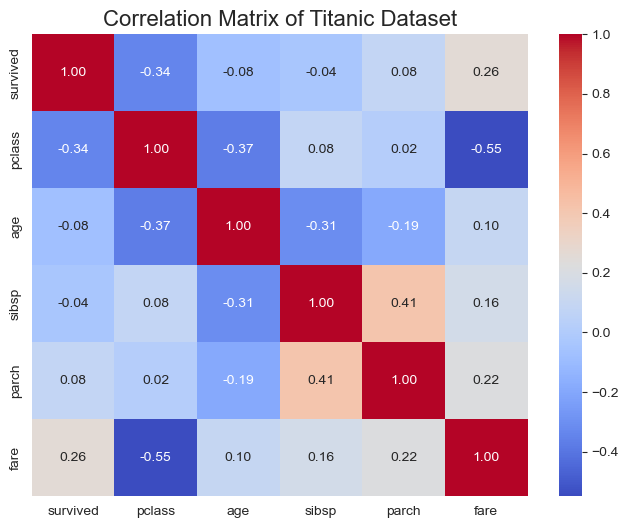

In [7]:
# 设置Seaborn的风格和颜色调色板
sns.set_style("darkgrid")

# 设置图片大小
plt.figure(figsize=(8, 6))  # 设置宽8英寸，高6英寸

# 绘制热力图
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)

# 设置标题
plt.title('Correlation Matrix of Titanic Dataset', fontsize=16)

# 显示图表
plt.show()

### center设置颜色条的中心值

**center**用于设置热力图的中心值。如果设置了 center，则会围绕该值来平衡颜色映射。例如，center=0 会使 0 的值处于颜色条的中间位置，正负数值会根据它对称地分布

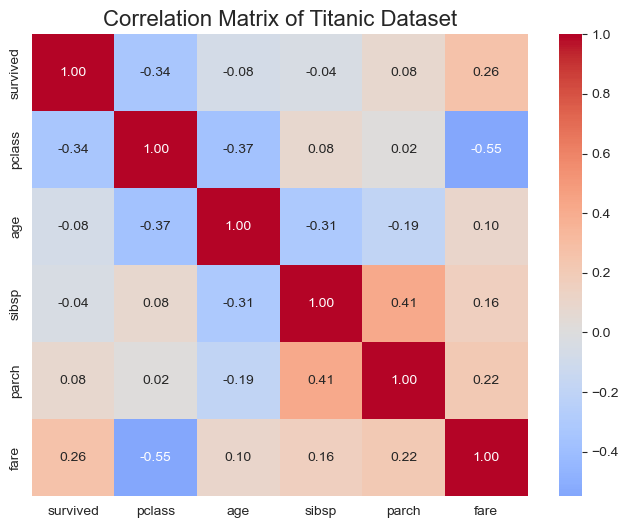

In [8]:
# 设置Seaborn的风格和颜色调色板
sns.set_style("darkgrid")

# 设置图片大小
plt.figure(figsize=(8, 6))  # 设置宽8英寸，高6英寸

# 绘制热力图
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', cbar=True, center=0)

# 设置标题
plt.title('Correlation Matrix of Titanic Dataset', fontsize=16)

# 显示图表
plt.show()